In [164]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
words = open('names.txt', 'r').read().splitlines();
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [166]:
chars = sorted(set(''.join(words)));
stoi = {s:i + 1 for i,s in enumerate(chars)}
stoi['.'] = 0;
itos = {i:s for s,i in  stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [167]:

block_size= 3;
X,Y = [], [];
for w in words[:]:
    #print(w);
    context = [0]  * block_size;
    for ch in w + '.':
       
        ix = stoi[ch]
        X.append(context);
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix];
        
X = torch.tensor(X);
Y = torch.tensor(Y);
        

In [168]:
def build_dataset(words):
    block_size= 3;
    X,Y = [], [];
    for w in words[:]:
        #print(w);
        context = [0]  * block_size;
        for ch in w + '.':
       
            ix = stoi[ch]
            X.append(context);1
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '---->', itos[ix])
            context = context[1:] + [ix];
        
    X = torch.tensor(X);
    Y = torch.tensor(Y);
    return X,Y

import random
random.seed(42);
random.shuffle(words);
n1 = int(0.8 * len(words));
n2 = int(0.9 * len(words));
Xtr, Ytr = build_dataset(words[:n1]);
Xdev, Ydev = build_dataset(words[:n2])
Xte, Yte = build_dataset(words[n2:])

    

In [169]:
print(X);

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])


In [170]:
#F.one_hot(torch.tensor(5), num_classes=27).float() @C
#same as indexing into C so we use indexing
lre = torch.linspace(-3, 0, 1000);
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [171]:
g = torch.Generator().manual_seed(2147483647)

C = torch.randn(27,10, generator=g);



w1 = torch.randn((30,300),generator=g)
b1 = torch.randn(300,generator=g)

w2 = torch.randn(300,27,generator=g);
b2 = torch.randn(27,generator=g);
parameters = [C,w1, b1, w2, b2]
lri = [];
lossi = []
stepi = []

In [176]:

for p in parameters:
    p.requires_grad = True;

    
for i in range(20000):
    #making minibactch
    ix=  torch.randint(0, Xtr.shape[0], (32, ))
    #forward pass
    #first layer
    emb = C[Xtr[ix]];
    embcat = torch.cat(torch.unbind(emb, 1), 1)
    h = torch.tanh(embcat @ w1 + b1)


    #Second layer
    logits = h @w2 + b2;
    # counts = logits.exp();
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()

    loss = F.cross_entropy(logits, Ytr[ix]);
    for p in parameters:
        p.grad = None;
    loss.backward();
    #update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    
    #track item
    # lri.append(lre[i]);
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

2.5876572132110596


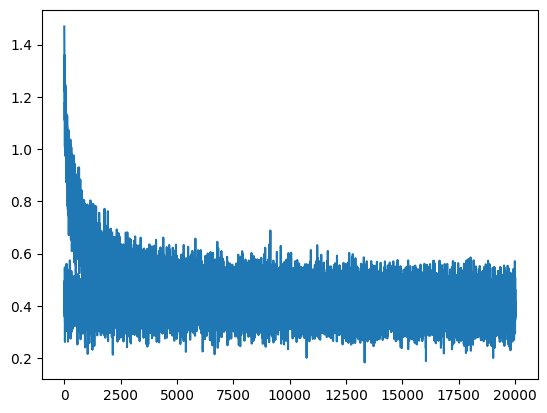

In [177]:
#plt.plot(lri, lossi)
plt.plot(stepi, lossi)

In [178]:
#evaluation
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30)  @w1 + b1)
logits = h @w2 + b2;
loss = F.cross_entropy(logits, Ydev);
print(loss.item());

2.6073458194732666


In [179]:
# plt.figure(figsize=(8,8))

# plt.scatter(C[:,0].detach(), C[:,1].detach(), s=200)

# for i in range(C.shape[0]):
    
#     plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')

# plt.grid('minor')
# plt.show() 

In [184]:
for _ in range(20):
    out = [];
    context = [0] * block_size;
    while True:
        emb = C[torch.tensor([context])];
        h = torch.tanh(emb.view(1,-1) @w1+ b1)
        logits = h @w2 + b2;
        probs = F.softmax(logits, dim=1);
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

savna.
arart.
arian.
jayne.
arher.
sah.
rerayna.
emar.
arn.
abhe.
ara.
jay.
ara.
aran.
ashrian.
broor.
tara.
evaan.
rer.
zach.
